# Patterns

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import seaborn as sns
import re
# !pip install rarfile
# !pip install plotly
import rarfile
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# # raw files
# rar_path = rarfile.RarFile('../../../edsa-traffic/SANRAL/raw/October 2014.rar')
# rar_file = rarfile.RarFile.open(rar_path, 'October 2014.txt')
# all_cars_raw = pd.read_csv(rar_file, delimiter='|', low_memory = False)
# all_cars_raw.head()

In [3]:
! ls /../edsa-traffic/SANRAL

all_cars_agg.csv  all_vel_agg.csv  df_agg_counts.csv  gantry_locations.csv  raw


In [4]:
#Importing SANRAL the data
all_cars_agg = pd.read_csv('/../edsa-traffic/SANRAL/all_cars_agg.csv')
all_cars_agg.head()

,Unnamed: 0,vehicle,Unnamed: 0.1,time,gantry,class,start_gantry,duration,same_vehicle_flag,distance,...,velocity_max,velocity_std,hour_max,hour_min,hour_mean,hour_std,distance_max,distance_min,distance_mean,distance_std
0,0,2.0,450450,2014-10-01 07:29:10,1021,2,1021,NaN,True,NaN,...,80.880573,NaN,14.370370,12.259259,13.314815,12.259259,8.947407,6.964074,8.008119,NaN
1,1,4.0,2363285,2014-10-01 19:04:03,1008,2,1008,NaN,True,NaN,...,83.166892,NaN,14.666667,13.000000,13.833333,13.000000,9.595185,6.132963,7.802634,NaN
2,2,6.0,2618973,2014-10-01 11:06:00,1044,3,1032,NaN,True,NaN,...,80.385138,NaN,13.185185,10.666667,11.925926,10.666667,9.292593,5.928148,7.526190,NaN
3,3,12.0,822719,2014-10-01 10:02:23,1008,2,1008,NaN,True,NaN,...,97.674825,NaN,14.185185,10.777778,12.481481,10.777778,10.486296,6.355556,8.122230,NaN
4,4,21.0,2187613,2014-10-01 18:06:45,1003,2,1002,NaN,True,NaN,...,97.525108,NaN,13.814815,8.740741,11.277778,8.740741,10.420741,6.329630,8.304617,NaN


In [5]:
all_cars_agg.columns

Index(['Unnamed: 0', 'vehicle', 'Unnamed: 0.1', 'time', 'gantry', 'class',
       'start_gantry', 'duration', 'same_vehicle_flag', 'distance', 'velocity',
       'hour', 'velocity_mean', 'velocity_min', 'velocity_max', 'velocity_std',
       'hour_max', 'hour_min', 'hour_mean', 'hour_std', 'distance_max',
       'distance_min', 'distance_mean', 'distance_std'],
      dtype='object')

In [6]:
cars_cols = ['vehicle', 'Unnamed: 0','Unnamed: 0.1', 'distance','velocity_min','velocity_max', 'velocity_std', 'hour_min','hour_std', 'distance_max', 'distance_min','distance_std']

In [7]:
all_vel_agg = pd.read_csv('/../edsa-traffic/SANRAL/all_vel_agg.csv')
all_vel_agg.head()

,Unnamed: 0,day,hour,start_gantry,gantry,count,mean,median,prec80,std
0,0,1.0,7.0,1001.0,1002.0,2.0,6.713848,6.713848,7.717085,2.364652
1,1,1.0,8.0,1001.0,1002.0,1.0,5.130874,5.130874,5.130874,NaN
2,2,1.0,9.0,1001.0,1002.0,7.0,27.059633,5.502707,7.413323,57.440661
3,3,1.0,10.0,1001.0,1002.0,4.0,6.420032,6.321328,8.042623,2.192687
4,4,1.0,11.0,1001.0,1002.0,1.0,3.850211,3.850211,3.850211,NaN


In [8]:
df_agg_counts = pd.read_csv('/../edsa-traffic/SANRAL/df_agg_counts.csv')
df_agg_counts.head()

,gantry,time,time1,count
0,1001,1,0,211
1,1001,1,1,183
2,1001,1,2,153
3,1001,1,3,183
4,1001,1,4,380


In [9]:
gantry_locations = pd.read_csv('/../edsa-traffic/SANRAL/gantry_locations.csv')
gantry_locations.head()

,Gantry,Gantry Name,Route,Latitude,Longitude,GantryN
0,1001,Barbet,N1,-25.7562,28.2744,1001
1,1002,Mossie,N1,-25.8194,28.2534,1002
2,1003,Indlazi,N1,-25.8443,28.2303,1003
3,1004,Pikoko,N1,-25.8732,28.1798,1004
4,1005,Ivusi,N1,-25.8978,28.1632,1005


In [10]:
all_cars_agg.drop(cars_cols,axis=1,inplace=True)

In [11]:
all_cars_agg.head()

,time,gantry,class,start_gantry,duration,same_vehicle_flag,velocity,hour,velocity_mean,hour_max,hour_mean,distance_mean
0,2014-10-01 07:29:10,1021,2,1021,NaN,True,1.581972,7,72.310135,14.370370,13.314815,8.008119
1,2014-10-01 19:04:03,1008,2,1008,NaN,True,1.040171,19,63.792628,14.666667,13.833333,7.802634
2,2014-10-01 11:06:00,1044,3,1032,NaN,True,55.942446,11,58.798236,13.185185,11.925926,7.526190
3,2014-10-01 10:02:23,1008,2,1008,NaN,True,1.609318,10,79.815129,14.185185,12.481481,8.122230
4,2014-10-01 18:06:45,1003,2,1002,NaN,True,2.301399,18,72.962751,13.814815,11.277778,8.304617


In [12]:
all_cars_agg['speed'] = all_cars_agg['hour']*all_cars_agg['velocity']
all_cars_agg.head()

,time,gantry,class,start_gantry,duration,same_vehicle_flag,velocity,hour,velocity_mean,hour_max,hour_mean,distance_mean,speed
0,2014-10-01 07:29:10,1021,2,1021,NaN,True,1.581972,7,72.310135,14.370370,13.314815,8.008119,11.073803
1,2014-10-01 19:04:03,1008,2,1008,NaN,True,1.040171,19,63.792628,14.666667,13.833333,7.802634,19.763258
2,2014-10-01 11:06:00,1044,3,1032,NaN,True,55.942446,11,58.798236,13.185185,11.925926,7.526190,615.366906
3,2014-10-01 10:02:23,1008,2,1008,NaN,True,1.609318,10,79.815129,14.185185,12.481481,8.122230,16.093184
4,2014-10-01 18:06:45,1003,2,1002,NaN,True,2.301399,18,72.962751,13.814815,11.277778,8.304617,41.425182


In [13]:
all_cars_agg['distance'] = all_cars_agg['hour']*all_cars_agg['speed']
all_cars_agg.head()

,time,gantry,class,start_gantry,duration,same_vehicle_flag,velocity,hour,velocity_mean,hour_max,hour_mean,distance_mean,speed,distance
0,2014-10-01 07:29:10,1021,2,1021,NaN,True,1.581972,7,72.310135,14.370370,13.314815,8.008119,11.073803,77.516620
1,2014-10-01 19:04:03,1008,2,1008,NaN,True,1.040171,19,63.792628,14.666667,13.833333,7.802634,19.763258,375.501911
2,2014-10-01 11:06:00,1044,3,1032,NaN,True,55.942446,11,58.798236,13.185185,11.925926,7.526190,615.366906,6769.035971
3,2014-10-01 10:02:23,1008,2,1008,NaN,True,1.609318,10,79.815129,14.185185,12.481481,8.122230,16.093184,160.931843
4,2014-10-01 18:06:45,1003,2,1002,NaN,True,2.301399,18,72.962751,13.814815,11.277778,8.304617,41.425182,745.653267


In [14]:
all_cars_agg['duration'] = all_cars_agg['hour_mean'] 
c_cols = ['distance_mean', 'hour_mean', 'hour_max']
all_cars_agg.drop(c_cols,axis=1,inplace=True)
all_cars_agg.tail()

,time,gantry,class,start_gantry,duration,same_vehicle_flag,velocity,hour,velocity_mean,speed,distance
439457,2014-10-01 09:01:03,1002,2,1004,NaN,True,5.833020,9,NaN,52.497183,472.474646
439458,2014-10-01 11:43:52,1012,2,1013,NaN,True,3.241281,11,NaN,35.654093,392.195018
439459,2014-10-01 16:22:11,1013,2,1011,NaN,True,108.116505,16,NaN,1729.864078,27677.825243
439460,2014-10-01 07:16:25,1019,2,1032,NaN,True,19.395000,7,NaN,135.765000,950.355000
439461,2014-10-01 06:39:40,1019,2,1020,NaN,True,20.712676,6,NaN,124.276056,745.656338


# Speed Patterns on all gantries

In [15]:
all_cars_agg['actual_time'] = pd.to_datetime(all_cars_agg['time']).dt.time
all_cars_agg.head()

,time,gantry,class,start_gantry,duration,same_vehicle_flag,velocity,hour,velocity_mean,speed,distance,actual_time
0,2014-10-01 07:29:10,1021,2,1021,13.314815,True,1.581972,7,72.310135,11.073803,77.516620,07:29:10
1,2014-10-01 19:04:03,1008,2,1008,13.833333,True,1.040171,19,63.792628,19.763258,375.501911,19:04:03
2,2014-10-01 11:06:00,1044,3,1032,11.925926,True,55.942446,11,58.798236,615.366906,6769.035971,11:06:00
3,2014-10-01 10:02:23,1008,2,1008,12.481481,True,1.609318,10,79.815129,16.093184,160.931843,10:02:23
4,2014-10-01 18:06:45,1003,2,1002,11.277778,True,2.301399,18,72.962751,41.425182,745.653267,18:06:45


- Day driving speeds 

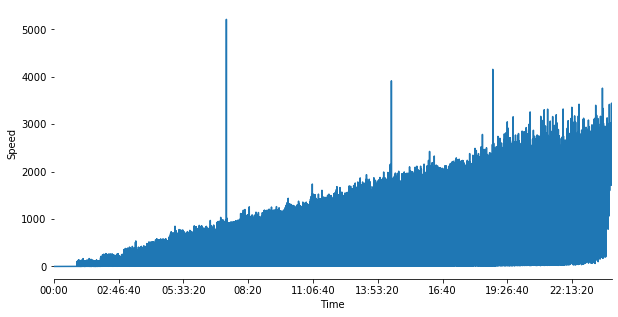

In [16]:
# Day driving speed acrross all gantries
time_vl = pd.Series(data=all_cars_agg['speed'].values,
                       index=all_cars_agg['actual_time'])
ax = time_vl.plot(kind='line',figsize=(10, 5))
ax.set_ylabel('Speed')
ax.set_xlabel('Time')
sns.despine(left=True)
plt.show()

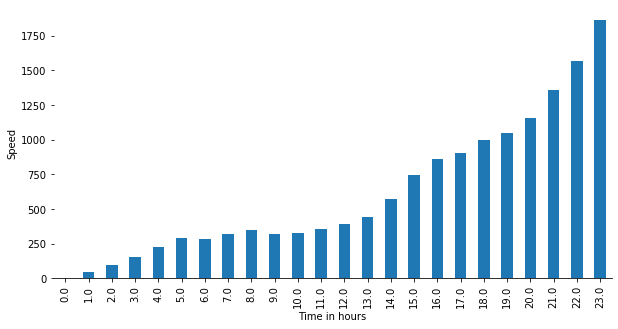

In [17]:
df3 = all_cars_agg.groupby('hour')[list(all_cars_agg)].mean()

# Average speed during the day 
time_vl = pd.Series(data=df3['speed'].values,
                       index=df3['hour'])
ax = time_vl.plot(kind='bar',figsize=(10, 5))
ax.set_ylabel('Speed')
ax.set_xlabel('Time in hours')
sns.despine(left=True)
plt.show()

- Speeding vehicle types

In [18]:
# df2['speed'].index

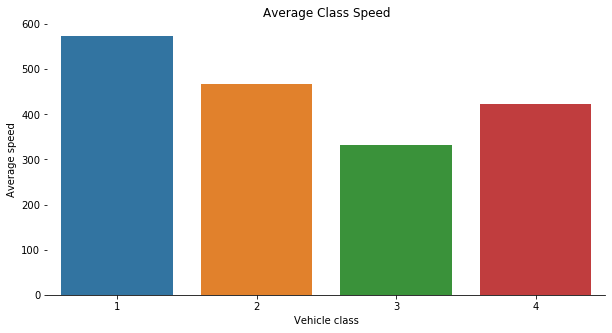

In [19]:
df2 = all_cars_agg.groupby('class')[['speed']].mean()

# Average speed for each vehicle class
num_c = df2['speed']
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(num_c.index, num_c.values)
ax.set_ylabel('Average speed')
ax.set_xlabel('Vehicle class')
ax.set_title('Average Class Speed')
sns.despine(left=True)
plt.show()

In [20]:
np.log1p(all_cars_agg[(all_cars_agg['class'] == 1)]['speed']).apply(lambda x:int(x)).values[0:10]

array([6, 2, 5, 6, 6, 4, 7, 6, 5, 6])

In [21]:
x1 = np.log1p(all_cars_agg[(all_cars_agg['class'] == 1)]['speed']).apply(lambda x:int(x)).values
x2 = np.log1p(all_cars_agg[(all_cars_agg['class'] == 2)]['speed']).apply(lambda x:int(x)).values
x3 = np.log1p(all_cars_agg[(all_cars_agg['class'] == 3)]['speed']).apply(lambda x:int(x)).values
x4 = np.log1p(all_cars_agg[(all_cars_agg['class'] == 4)]['speed']).apply(lambda x:int(x)).values

group_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

hist_data = [x1, x2, x3, x4]
# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, bin_size=1,
                         curve_type='normal', # override default 'kde'
                        show_hist=False, show_rug=False)

# Add title
# fig.update_layout(title_text='Distplot with Normal Distribution')
# fig.update_yaxes(title_text="class distribution")
# fig.update_xaxes(title_text="Speed")
fig.show()

- Speedy roads

In [22]:
gantry_locations.head()

,Gantry,Gantry Name,Route,Latitude,Longitude,GantryN
0,1001,Barbet,N1,-25.7562,28.2744,1001
1,1002,Mossie,N1,-25.8194,28.2534,1002
2,1003,Indlazi,N1,-25.8443,28.2303,1003
3,1004,Pikoko,N1,-25.8732,28.1798,1004
4,1005,Ivusi,N1,-25.8978,28.1632,1005


In [23]:
# add the route associated with gantry
mapping = dict(gantry_locations[['Gantry','Route']].values)
all_cars_agg['route'] = all_cars_agg.gantry.map(mapping)
all_cars_agg.head()

,time,gantry,class,start_gantry,duration,same_vehicle_flag,velocity,hour,velocity_mean,speed,distance,actual_time,route
0,2014-10-01 07:29:10,1021,2,1021,13.314815,True,1.581972,7,72.310135,11.073803,77.516620,07:29:10,N3
1,2014-10-01 19:04:03,1008,2,1008,13.833333,True,1.040171,19,63.792628,19.763258,375.501911,19:04:03,N1
2,2014-10-01 11:06:00,1044,3,1032,11.925926,True,55.942446,11,58.798236,615.366906,6769.035971,11:06:00,R21
3,2014-10-01 10:02:23,1008,2,1008,12.481481,True,1.609318,10,79.815129,16.093184,160.931843,10:02:23,N1
4,2014-10-01 18:06:45,1003,2,1002,11.277778,True,2.301399,18,72.962751,41.425182,745.653267,18:06:45,N1


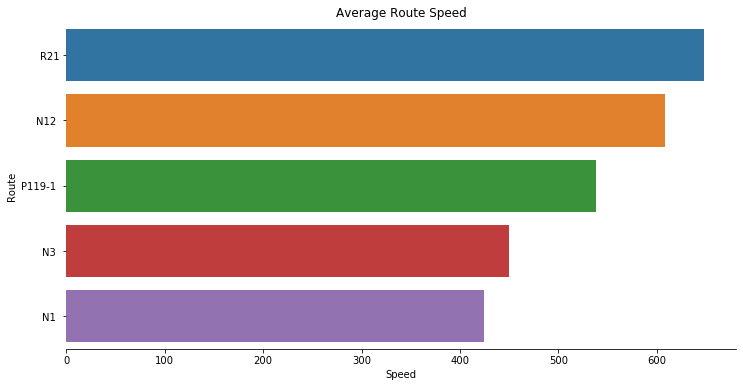

In [24]:
df4 = all_cars_agg.groupby('route')[['speed']].mean().sort_values('speed', ascending=False)
num_c = df4['speed']
f, ax = plt.subplots(figsize=(12,6))
sns.barplot( num_c.values, num_c.index)
ax.xaxis.grid(False)
ax.set_xlabel('Speed')
ax.set_ylabel('Route')
ax.set_title('Average Route Speed')
sns.despine(left=True)

- Speedy gantries

In [25]:
# add the name associated with gantry
mapping = dict(gantry_locations[['Gantry','Gantry Name']].values)
all_cars_agg['gantry_name'] = all_cars_agg.gantry.map(mapping)
all_cars_agg.head()

,time,gantry,class,start_gantry,duration,same_vehicle_flag,velocity,hour,velocity_mean,speed,distance,actual_time,route,gantry_name
0,2014-10-01 07:29:10,1021,2,1021,13.314815,True,1.581972,7,72.310135,11.073803,77.516620,07:29:10,N3,Kwikkie
1,2014-10-01 19:04:03,1008,2,1008,13.833333,True,1.040171,19,63.792628,19.763258,375.501911,19:04:03,N1,Sunbird
2,2014-10-01 11:06:00,1044,3,1032,11.925926,True,55.942446,11,58.798236,615.366906,6769.035971,11:06:00,R21,Weaver
3,2014-10-01 10:02:23,1008,2,1008,12.481481,True,1.609318,10,79.815129,16.093184,160.931843,10:02:23,N1,Sunbird
4,2014-10-01 18:06:45,1003,2,1002,11.277778,True,2.301399,18,72.962751,41.425182,745.653267,18:06:45,N1,Indlazi


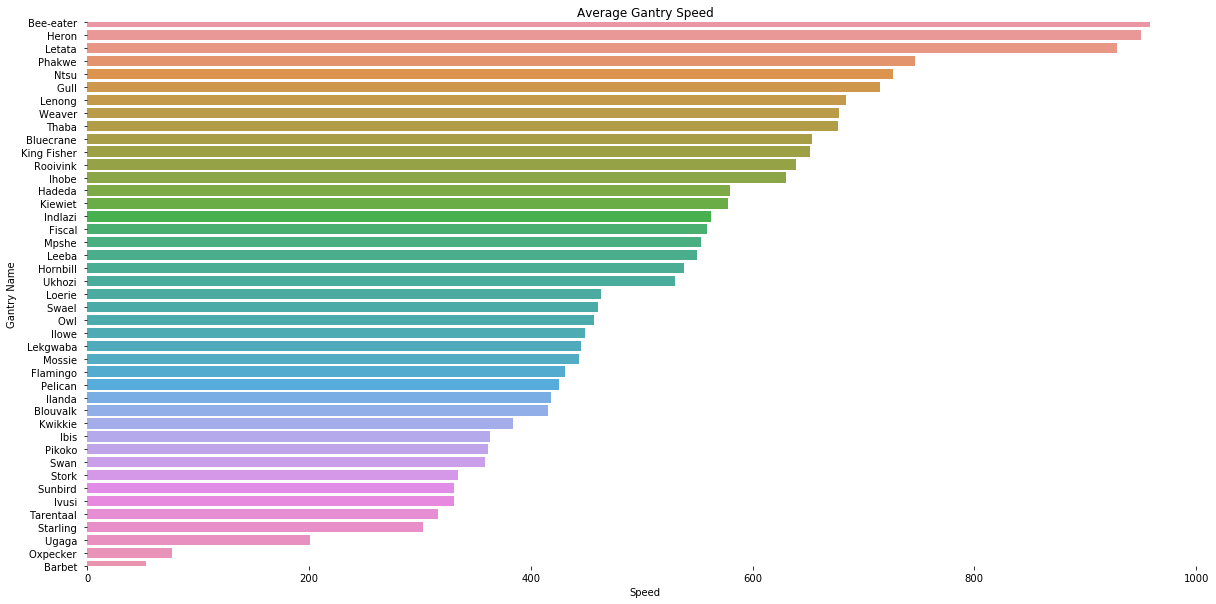

In [26]:
df5 = all_cars_agg.groupby('gantry_name')[['speed']].mean().sort_values('speed', ascending=False)
num_c = df5['speed']
f, ax = plt.subplots(figsize=(20,10))
sns.barplot( num_c.values, num_c.index)
ax.xaxis.grid(False)
ax.set_xlabel('Speed')
ax.set_ylabel('Gantry Name')
ax.set_title('Average Gantry Speed')
sns.despine(trim=True, left=True, bottom=True)

- Slow/congested hours during the day

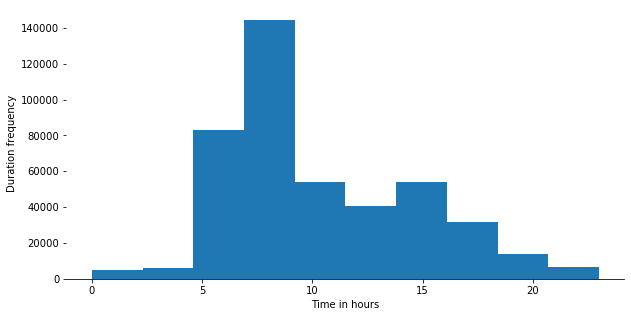

In [27]:
# Travel time duration during the day 
time_vl = pd.Series(data=all_cars_agg['hour'].values,
                       index=all_cars_agg['duration'])
ax = time_vl.plot(kind='hist',figsize=(10, 5))
ax.set_ylabel('Duration frequency')
ax.set_xlabel('Time in hours')
sns.despine(left=True)
plt.show()

# Speed Patterns per gantry (1002-1003)

Times of delay

In [28]:
all_cars_agg[(all_cars_agg['start_gantry'] == 1002)
             & (all_cars_agg['gantry'] == 1003)][['duration', 'time']].sort_values('duration', ascending=False).head()

,duration,time
228690,15.074074,2014-10-01 12:52:16
9873,14.907407,2014-10-01 10:48:56
163289,14.518519,2014-10-01 11:29:40
91576,14.425926,2014-10-01 15:50:55
219561,14.351852,2014-10-01 19:01:50


In [29]:
cols1= list(all_cars_agg)

In [30]:
# Data between gantry 2 and 3
df1 = all_cars_agg[(all_cars_agg['start_gantry'] == 1002)
             & (all_cars_agg['gantry'] == 1003)][cols1]
df1.head()

,time,gantry,class,start_gantry,duration,same_vehicle_flag,velocity,hour,velocity_mean,speed,distance,actual_time,route,gantry_name
4,2014-10-01 18:06:45,1003,2,1002,11.277778,True,2.301399,18,72.962751,41.425182,745.653267,18:06:45,N1,Indlazi
112,2014-10-01 16:30:10,1003,2,1002,12.185185,True,2.047904,16,65.699945,32.766467,524.263473,16:30:10,N1,Indlazi
299,2014-10-01 06:48:37,1003,1,1002,12.574074,True,2.085031,6,67.753045,12.510188,75.061126,06:48:37,N1,Indlazi
509,2014-10-01 07:03:54,1003,2,1002,12.203704,True,8.919698,7,72.666025,62.437886,437.065202,07:03:54,N1,Indlazi
523,2014-10-01 09:36:27,1003,2,1002,11.574074,True,7.426286,9,79.088900,66.836571,601.529143,09:36:27,N1,Indlazi


- Day driving speeds 

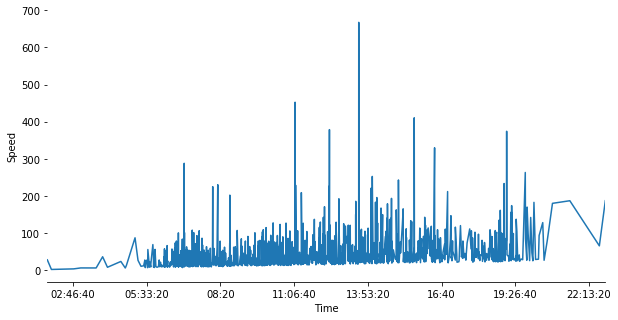

In [31]:
time_vl = pd.Series(data=df1['speed'].values,
                       index=df1['actual_time'])
ax = time_vl.plot(kind='line',figsize=(10, 5))
ax.set_ylabel('Speed')
ax.set_xlabel('Time')
sns.despine(left=True)
plt.show()

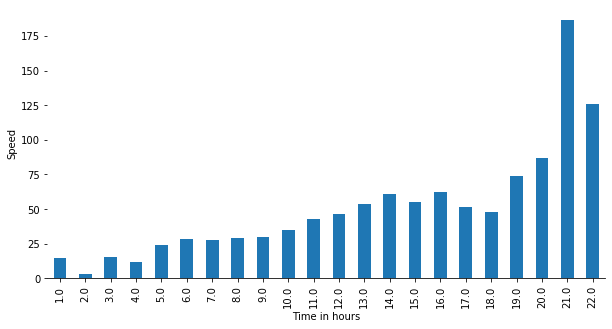

In [32]:
df3 = df1.groupby('hour')[list(df1)].mean()
# Average speed during the day 
time_vl = pd.Series(data=df3['speed'].values,
                       index=df3['hour'])
ax = time_vl.plot(kind='bar',figsize=(10, 5))
ax.set_ylabel('Speed')
ax.set_xlabel('Time in hours')
sns.despine(left=True)
plt.show()


- Speeding vehicle types (vehicle type 4 may be restricted from gantry)

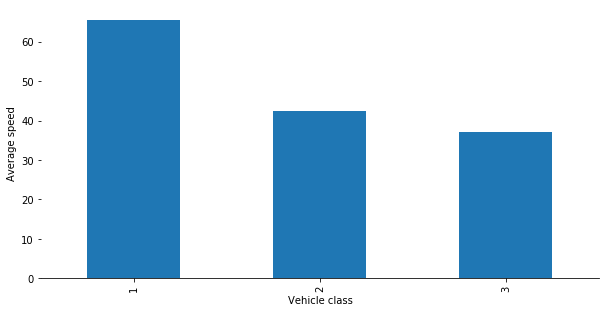

In [33]:
df2 = df1.groupby('class')[['speed']].mean()
# Average speed for each vehicle class
time_vl = pd.Series(data=df2['speed'].values,
                       index=df2.index)
ax = time_vl.plot(kind='bar',figsize=(10, 5))
ax.set_ylabel('Average speed')
ax.set_xlabel('Vehicle class')
sns.despine(left=True)
plt.show()

In [34]:
x1 = np.log1p(df1[(df1['class'] == 1)]['speed']).apply(lambda x:int(x)).values
x2 = np.log1p(df1[(df1['class'] == 2)]['speed']).apply(lambda x:int(x)).values
x3 = np.log1p(df1[(df1['class'] == 3)]['speed']).apply(lambda x:int(x)).values

group_labels = ['Class 1', 'Class 2', 'Class 3']

hist_data = [x1, x2, x3]
# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, bin_size=1,
                         curve_type='normal', # override default 'kde'
                        show_hist=False, show_rug=False)

# # Add title
# fig.update_layout(title_text='Distplot with Normal Distribution')
# fig.update_yaxes(title_text="class distribution")
# fig.update_xaxes(title_text="Speed")

fig.show()

- Slow/congested hours during the day

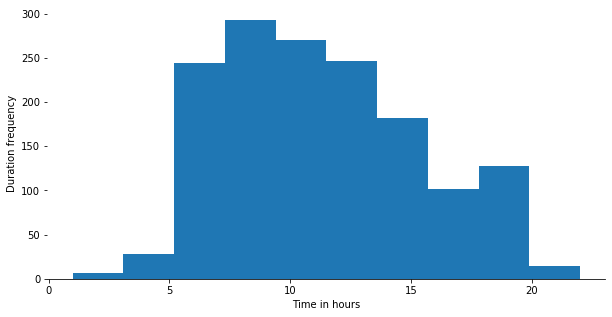

In [35]:
# Travel time duration during the day 
time_vl = pd.Series(data=df1['hour'].values,
                       index=df1['duration'])
ax = time_vl.plot(kind='hist',figsize=(10, 5))
ax.set_ylabel('Duration frequency')
ax.set_xlabel('Time in hours')
sns.despine(left=True)
plt.show()